Which Prepaid Plan is Better?

You work as an analyst at a telecom operator called Megaline. The company offers its clients two types of prepaid plans, the Surf plan and the Ultimate plan. The advertising department wants to know which prepaid plan generates more revenue, so they can budget their ads accordingly.

You will conduct a preliminary analysis of these prepaid plans based on a relatively small sample of clients. You have 500 Megaline clients' data, which contains information such as: who they are, where they come from, what type of plan they use, and the number of calls and messages they sent in 2018. Your task is to analyze the users' behavior and determine which prepaid plan is more profitable.

# Introduction

This project contains two types of prepaid packages, namely the Surf package and the Ultimate package which aims to find out which prepaid package is more profitable for the Megaline company.

The data needed for analysis is divided into 5 datasets namely Prepaid Packages, Users, Calls, Messages/SMS and Internet. The analysis will be carried out in the form of Preparing data which includes improving data quality in each dataset. Furthermore, Aggregating Data where the five datasets will be aggregated and merged into one new dataframe to facilitate further analysis, followed by statistical analysis on user behavior and revenue earned. The final stage is statistical hypothesis testing.

## Initialization

Loads the libraries needed for analysis.

In [3]:
# Load all library
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np
from scipy import stats as st
import math as mt


## Load Data

Loads the data needed for analysis.

In [4]:
# Load all file into different DataFrames

df_users = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint4\megaline_users.csv')

df_calls = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint4\megaline_calls.csv')

df_messages = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint4\megaline_messages.csv')

df_internet = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint4\megaline_internet.csv')

df_plans = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint4\megaline_plans.csv')

## Data Preparation

The data in this project is divided into different dataframes, examining the data in each dataframe is done to facilitate data aggregation in the future.

### Prepaid Plan

In [5]:
# Show general information/summary about prepaid plans DataFrame
df_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [6]:
# Show all data sample from all plan
df_plans.sample()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


The prepaid package dataframe contains the price of the package offered by the company where the package contains details of the total messages, total internet package and total call minutes per month in the package. Also in this dataframe contains if the usage exceeds the total package offered, the user will get additional fees per gigabyte, per minute and per message detailed in different prices, for the data in this dataframe there are no significant problems.

### Users

In [7]:
# Show general information about the user's dataframe 
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [8]:
# Show data sample of user
df_users.sample()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
406,1406,Noble,Jefferson,54,"San Diego-Chula Vista-Carlsbad, CA MSA",2018-03-04,surf,NaN


This dataframe contains user details including first and last name, age, address, registration date, plan type and unsubscribe date. On inspection, it was found that the `reg_date` and `churn_date` columns are object format which should be datetime format. Format changes will be made to make the data easier to analyze.

#### Data Correction

In [9]:
# Change column 'reg_date' from object to datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

In [10]:
# Change column 'churn_date' from object to datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

#### Enriching Data Quality

In order to make the dataframe easier to analyze and aggregate with other dataframes, duplicate checking and the addition of the `month` column to the dataframe will be done by taking the month in the `reg_date` column.

In [11]:
# Checking data duplicated
df_users.duplicated().sum()

0

In [12]:
# Add a 'month' column to the dataframe
df_users['month'] = df_users['reg_date'].dt.month

In [13]:
# Show 10 first rows from df_users
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,11
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,7
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,8
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,4


### Calls

In [14]:
# Show general information about the call's DataFrame
df_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [15]:
# Show data sample
df_calls.sample()


,id,user_id,call_date,duration
42257,1155_222,1155,2018-11-22,13.27


his dataframe contains the details of the call made by the user which contains the date of the call and its duration. On inspection, it was found that the `call_date` column has an object format which should be a datetime format. Format changes will be made to make the data easier to analyze.

#### Data Correction

In [16]:
# Mengubah kolom 'call_date' dari object ke datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

#### Enriching Data Quality

To make the dataframe easier to analyze and aggregate with other dataframes, duplicate checking and adding a `month` column to the dataframe will be done by taking the month in the `call_date` column. Also rounding up durations that contain seconds values with apply() and np.ceil methods.

In [17]:
# Check for duplicate values in the dataframe
df_calls.duplicated().sum()

0

In [18]:
# Add 'month's column into df_calls
df_calls['month'] = df_calls['call_date'].dt.month

In [19]:
# Round up the duration value in the 'duration' column
df_calls['duration'] = df_calls['duration'].apply(np.ceil)

In [20]:
# Show 10 first rows from df_users
df_calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9.0,12
1,1000_145,1000,2018-12-27,14.0,12
2,1000_247,1000,2018-12-27,15.0,12
3,1000_309,1000,2018-12-28,6.0,12
4,1000_380,1000,2018-12-30,5.0,12
5,1000_388,1000,2018-12-31,3.0,12
6,1000_510,1000,2018-12-27,6.0,12
7,1000_521,1000,2018-12-28,15.0,12
8,1000_530,1000,2018-12-28,6.0,12
9,1000_544,1000,2018-12-26,5.0,12


### Messages/SMS

In [21]:
# Show general information about the messages's dataframe 
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [22]:
# Show data sample
df_messages.sample()


,id,user_id,message_date
23244,1141_2,1141,2018-07-25


This dataframe contains the details of the message sent by the user which contains the date the message was sent. On inspection, it was found that the `message_date` column has an object format which should be a datetime format. Format changes will be made to make the data easier to analyze.

#### Data Quality

In [23]:
# Change 'message_date''format from object to datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

#### Enriching Data Quality

In order to make the dataframe easier to analyze and aggregate with other dataframes, duplicate checking and the addition of the `month` column to the dataframe will be done by taking the month in the `message_date` column.

In [24]:
# Checking duplicated value in dataframe
df_messages.duplicated().sum()

0

In [25]:
# Add 'month''column ke dalam df_messages 
df_messages['month'] = df_messages['message_date'].dt.month

In [26]:
# Show first column
df_messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


### Internet

In [27]:
# Show general information about the internet's DataFrame
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [28]:
# Show data sample
df_internet.sample()

,id,user_id,session_date,mb_used
65429,1301_119,1301,2018-11-24,463.31


This dataframe contains details of the data volume used by the user which contains the date of the user session using the internet and how much data volume was spent. On inspection, it was found that the `session_date` column has an object format which should be a datetime format. Format changes will be made to make the data easier to analyze.

#### Data Correction

In [29]:
# Change 'session_date''s format from object to datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

#### Enriching Data Quality

In order to make the dataframe easier to analyze and aggregate with other dataframes, duplicate checking and the addition of the `month` column to the dataframe will be done by taking the month in the `session_date` column.

In [30]:
# Checking data duplicated from df_internet
df_internet.duplicated().sum()

0

In [31]:
# add 'month's column into df_internet
df_internet['month'] = df_internet['session_date'].dt.month

In [32]:
# Show 10 first row from df_internet
df_internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


## Learn the Terms and Conditions Related to Prepaid Plans

Display the prepaid package dataframe again

In [33]:
# View prepaid plan terms and make sure you understand them
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregating Data per User

Aggregation is performed on the number of calls, the number of minutes spent, the number of messages sent and the volume of internet traffic used by users per month, in which case a pivot_table() is required to facilitate analysis.

In [34]:
# Calculate the number of calls made by each user per month
df_total_calls = df_calls.pivot_table(index=['user_id','month'], values='call_date', aggfunc='count')

In [35]:
# Display the number of calls
df_total_calls

call_date
user_id month           
1000    12            16
1001    8             27
        9             49
        10            65
        11            64
...                  ...
1498    12            39
1499    9             41
        10            53
        11            45
        12            65

[2258 rows x 1 columns]

In [36]:
# Calculate the number of minutes spent by each user on calls per month. Save the result.
df_total_minutes = df_calls.pivot_table(index=['user_id','month'], values='duration', aggfunc='sum')


In [37]:
# Displays the number of minutes spent by each user
df_total_minutes

duration
user_id month          
1000    12        124.0
1001    8         182.0
        9         315.0
        10        393.0
        11        426.0
...                 ...
1498    12        339.0
1499    9         346.0
        10        385.0
        11        308.0
        12        496.0

[2258 rows x 1 columns]

In [38]:
# Calculate the number of SMS sent by each user per month. Save the result.
df_total_messages = df_messages.pivot_table(index=['user_id','month'], values='message_date', aggfunc='count')


In [39]:
# Display the number of SMS sent by each user
df_total_messages

message_date
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36
...                     ...
1496    9                21
        10               18
        11               13
        12               11
1497    12               50

[1806 rows x 1 columns]

In [40]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
df_total_used = df_internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum')


In [41]:
# Displays the volume of internet traffic used by each user
df_total_used

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [42]:
# Merge call, minute, SMS, and internet data based on user_id and month.
df0 = [df_total_minutes,df_total_messages,df_total_used]

# Merge call, minute, SMS, and internet data based on user_id and month with join() method.
df = df_total_calls.join(df0)

In [43]:
# Change the column name
df.columns = ['total_calls','duration_calls','total_messages','mb_used']

In [44]:
# Add prepaid plan information
df_plan_users = df_users.pivot_table(index='user_id', values='plan', aggfunc='sum')

In [45]:
# Merge prepaid plan information based on user_id and month with join() method.
df = df.join(df_plan_users)

In [46]:
# Display the first 10 rows in the dataframe
df.head(10)

total_calls  duration_calls  total_messages   mb_used      plan
user_id month                                                                 
1000    12            16.0           124.0            11.0   1901.47  ultimate
1001    8             27.0           182.0            30.0   6919.15      surf
        9             49.0           315.0            44.0  13314.82      surf
        10            65.0           393.0            53.0  22330.49      surf
        11            64.0           426.0            36.0  18504.30      surf
        12            56.0           412.0            44.0  19369.18      surf
1002    10            11.0            59.0            15.0   6552.01      surf
        11            55.0           386.0            32.0  19345.08      surf
        12            47.0           384.0            41.0  14396.24      surf
1003    12           149.0          1104.0            50.0  27044.14      surf

The data in the pivot table will be divided into new dataframes according to their respective prepackages, in this case using the reset_index() function.

In [47]:
df_plan_surf = df[df['plan']=='surf'].reset_index()

In [48]:
df_plan_ultimate = df[df['plan']=='ultimate'].reset_index()

Calculate the revenue for each user by declaring a function that includes a calculation of the number of minutes, number of messages and volume of internet traffic that the user has spent in each month.

In [49]:
# a function to make it easier to find the income value
def monthly_income(df, duration, message, mb, plan, plan_name, number):
    group_values = df[df[plan]== plan_name]
    calls_defisit = []
    messages_defisit = []
    mb_defisit = []
    income = []
    for i in group_values[duration]:
        plan_calls = i - df_plans.iloc[1]['minutes_included']
        calls_defisit.append(plan_calls)
    for i in group_values[message]:
        plan_messages = i - df_plans.iloc[number]['messages_included']
        messages_defisit.append(plan_messages)
    for i in group_values[mb]:
        plan_internet = i-df_plans.iloc[number]['mb_per_month_included']
        mb_defisit.append(plan_internet)
    for j,k,l in zip(calls_defisit, messages_defisit, mb_defisit):
        if ((j > 0) & (k > 0) & (l > 0)):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + (j*(df_plans.iloc[number]['usd_per_minute'])) + (k*(df_plans.iloc[number]['usd_per_message'])) + ((mt.ceil(l/1024))*(df_plans.iloc[number]['usd_per_gb'])))
        elif (j < 0) & (k < 0) & (l > 0):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + ((mt.ceil(l/1024))*(df_plans.iloc[number]['usd_per_gb'])))
        elif (j < 0) & (k > 0) & (l > 0):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + (k*(df_plans.iloc[number]['usd_per_message'])) + ((mt.ceil(l/1024))*(df_plans.iloc[number]['usd_per_gb'])))
        elif (j > 0) & (k < 0) & (l > 0):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + (j*(df_plans.iloc[number]['usd_per_minute'])) + ((mt.ceil(l/1024))*(df_plans.iloc[number]['usd_per_gb'])))
        elif (j > 0) & (k < 0) & (l < 0):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + (j*(df_plans.iloc[number]['usd_per_minute'])))
        elif (j > 0) & (k > 0) & (l < 0):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + (j*(df_plans.iloc[number]['usd_per_minute'])) + (k*(df_plans.iloc[number]['usd_per_message'])))
        elif (j < 0) & (k > 0) & (l < 0):
            income.append((df_plans.iloc[number]['usd_monthly_pay']) + (k*(df_plans.iloc[number]['usd_per_message'])))
        else:
            income.append((df_plans.iloc[number]['usd_monthly_pay']))
    df_number = pd.DataFrame(income, columns=['income'])
    return df_number

In [50]:
# Calculate monthly revenue for each 'surf' user
df_surf = monthly_income(df, 'duration_calls', 'total_messages', 'mb_used', 'plan', 'surf', 0)

# Show 10 first row
df_surf.head(10)

,income
0,20.00
1,20.00
2,90.09
3,60.00
4,60.00
5,20.00
6,60.00
7,20.00
8,20.00
9,20.00


In [51]:
# Add the function result into df_plan_surf
df_plan_surf['income'] = df_surf

# reset the index in the dataframe with the reset_index() function
df_plan_surf_pivot_table = df_plan_surf.pivot_table(index=['user_id','month'], values='income', aggfunc='sum').reset_index()

In [52]:
# Calculate monthly revenue for each 'ultimate' user
df_ultimate = monthly_income(df, 'duration_calls', 'total_messages', 'mb_used', 'plan', 'ultimate', 1)

# Show 10 first row
df_ultimate.head(10)

,income
0,70
1,70
2,84
3,70
4,70
5,70
6,70
7,70
8,70
9,70


In [53]:
# Add the function result into df_plan_ultimate
df_plan_ultimate['income'] = df_ultimate

# Reset the index in the dataframe with the reset_index() function
df_plan_ultimate_pivot_table = df_plan_ultimate.pivot_table(index=['user_id','month'], values='income', aggfunc='sum').reset_index()

In [54]:
# Merge the two dataframes surf and ultimate into df_users_income
df_users_income = df_plan_ultimate_pivot_table.append(df_plan_surf_pivot_table)

# Sort data based on 'user_id' column
df_users_income = df_users_income.sort_values(by='user_id')

# Display the first 10 rows of df_users_income
df_users_income.head(10)

C:\Users\asus\AppData\Local\Temp\ipykernel_2312\3392158328.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_users_income = df_plan_ultimate_pivot_table.append(df_plan_surf_pivot_table)


,user_id,month,income
0,1000,12,70.00
2,1001,10,90.09
3,1001,11,60.00
4,1001,12,60.00
1,1001,9,20.00
0,1001,8,20.00
5,1002,10,20.00
6,1002,11,60.00
7,1002,12,20.00
8,1003,12,20.00


The next step is to prepare the user city origin data to analyze the existing statistical hypothesis by separating two dataframes, the first dataframe contains revenue from users originating from New York-Newark-Jersey City and the second dataframe contains revenue from users originating from other than New York-Newark-Jersey City.

In [55]:
# Add 'city' column from df_users into df_users_income
df_users_income['city'] = df_users['city']

In [56]:
# Slicing user data originating from "New York-Newark-Jersey City, NY-NJ-PA MSA" with query()
df_users_income_NYNJ = df_users_income.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')

# Show 10 first rows
df_users_income_NYNJ.head(10)

,user_id,month,income,city
14,1004,10,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
22,1007,12,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
24,1009,6,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
27,1009,9,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
34,1010,6,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
31,1010,3,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
43,1014,12,20.42,"New York-Newark-Jersey City, NY-NJ-PA MSA"
45,1016,10,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
49,1017,9,110.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
53,1018,10,20.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"


In [57]:
# Slicing user data originating from other than "New York-Newark-Jersey City, NY-NJ-PA MSA" with query()
df_users_income_not_NYNJ = df_users_income.query('city !="New York-Newark-Jersey City, NY-NJ-PA MSA"')

# Show 10 first rows
df_users_income_not_NYNJ

,user_id,month,income,city
0,1000,12,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
2,1001,10,90.09,"Las Vegas-Henderson-Paradise, NV MSA"
3,1001,11,60.00,"Tulsa, OK MSA"
4,1001,12,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
1,1001,9,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...
1540,1498,12,20.00,NaN
1542,1499,10,20.00,NaN
1543,1499,11,20.00,NaN
1541,1499,9,20.00,NaN


## Studying User Behavior

In this case, it is done by displaying data visually with bar charts, histograms and boxplots. In addition to visual displays, average and variance calculations are also carried out on the data that has been aggregated and combined in the previous stage.

### Calls

<Axes: xlabel='month,plan'>

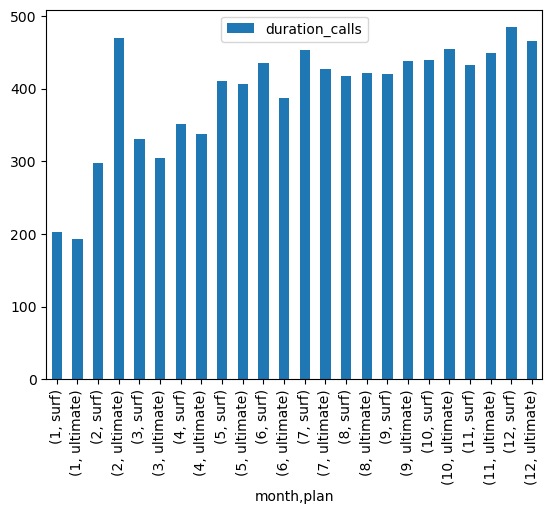

In [58]:
# Compare the average call duration of each plan per month.
duration_calls_mean=df.pivot_table(index=['month','plan'],values='duration_calls',aggfunc='mean')

# Display bar chart
duration_calls_mean.plot(kind='bar')

<Axes: xlabel='month,plan'>

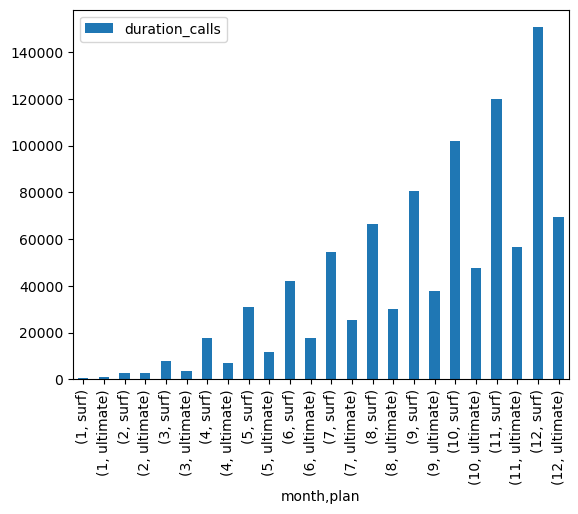

In [59]:
# Compare the number of minutes users need per plan per month.
duration_calls_total=df.pivot_table(index=['month','plan'],values='duration_calls',aggfunc='sum')

# Display bar chart
duration_calls_total.plot(kind='bar')

In [60]:
# Calculate the average of the monthly call durations
df['duration_calls'].mean()

435.9375553587245

In [61]:
# Calculate the variance of the monthly call duration
np.var(df['duration_calls'])

53787.33666754009

<Axes: >

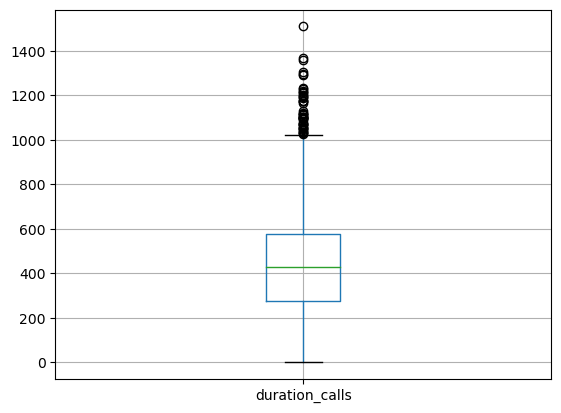

In [62]:
# Show a boxplot graph to visualize the distribution of monthly call durations
df.boxplot('duration_calls')

Users of both prepaid plans made calls with a relatively increasing number of minutes from month 1 to month 12 and certainly the most in month 12, but the average duration of calls with the ultimate plan in month 2 almost matched the average duration in month 12. This means that users of this plan made more short calls in month 12 which resulted in a lower average than month 2. The difference in the number of minutes spent on the two packages shows a significant difference in each month where the surf package is always the bigger one. The boxplot shows that there are outliers in the total minutes of calls.

### Messages/SMS

<Axes: xlabel='month,plan'>

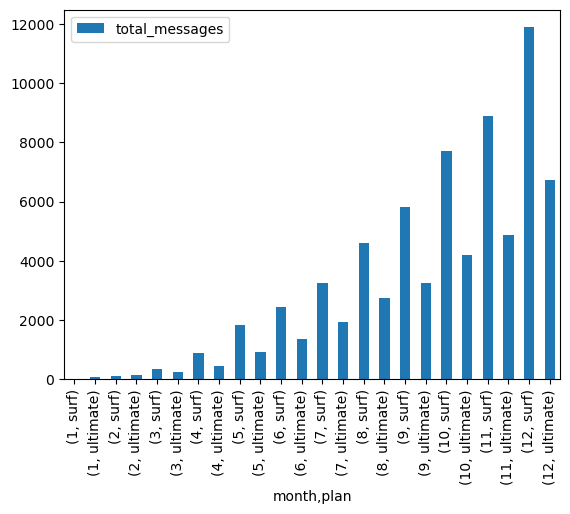

In [63]:
# Compare the number of message that users tend to send per plan per month
message_total=df.pivot_table(index=['month','plan'],values='total_messages',aggfunc='sum')

# Display bar chart
message_total.plot(kind='bar')

<Axes: xlabel='month,plan'>

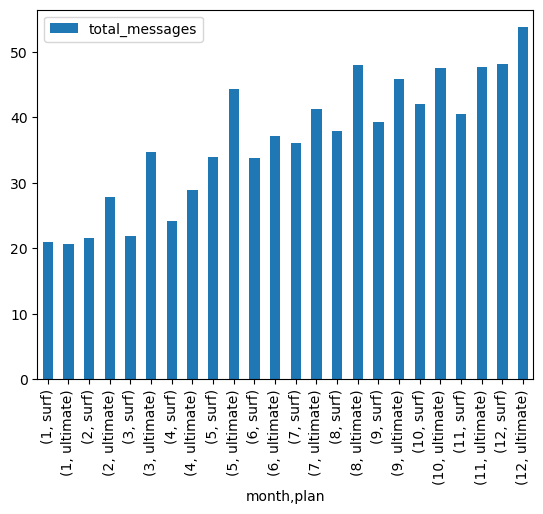

In [64]:
# Compare the average number of SMS that users tend to send per plan per month
message_total_mean=df.pivot_table(index=['month','plan'],values='total_messages',aggfunc='mean')

# Display bar chart
message_total_mean.plot(kind='bar')

In [65]:
# Calculating the average of the number of monthly messages
df['total_messages'].mean()

42.09531866892273

In [66]:
# Calculating the variance of the monthly message count
np.var(df['total_messages'])

1103.9271805668102

<Axes: >

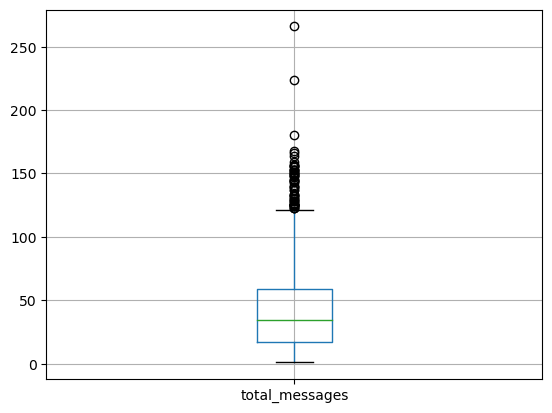

In [67]:
# Display a boxplot graph to visualize the distribution of the number of monthly messages
df.boxplot('total_messages')

Users of both prepaid plans sent a relatively increasing number of SMS from month 1 to month 12 and certainly the most in month 12, but the average number of messages with the ultimate plan in month 12 was the largest. This means that users of this plan send more messages in the 12th month which results in a higher average. The difference in the number of messages sent on the two packages shows a significant difference in each month where the surf package is always the bigger one. In the boxplot, it can be seen that there are data outliers in this call minutes data.

### Internet

<Axes: xlabel='month,plan'>

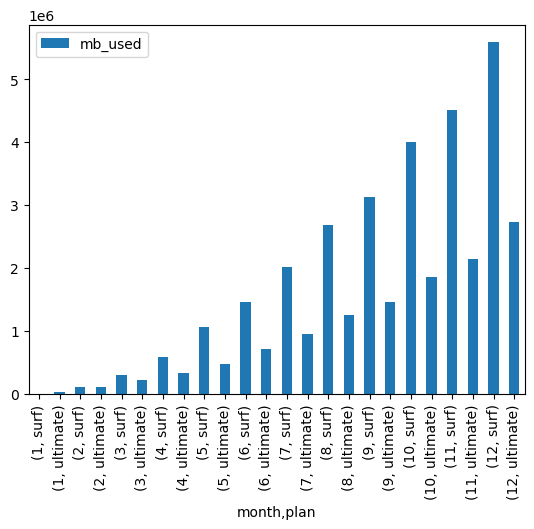

In [68]:
# Compare the amount of internet traffic spent by users per plan
mb_used_total = df.pivot_table(index=['month','plan'],values='mb_used',aggfunc='sum')

# Display bar chart
mb_used_total.plot(kind='bar')

<Axes: xlabel='month,plan'>

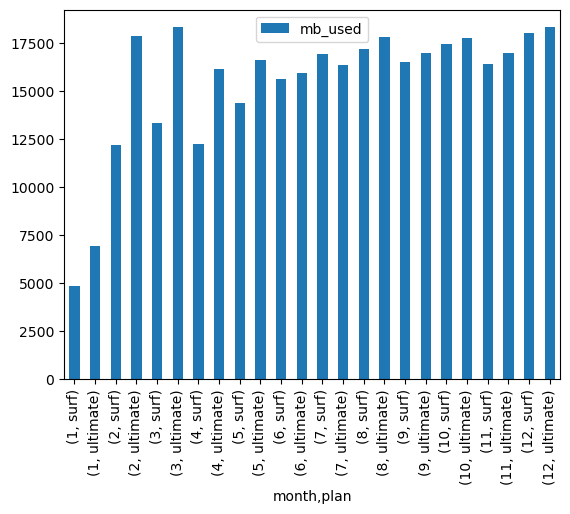

In [69]:
# Compare the average amount of internet traffic spent by users per plan
mb_used_total_mean = df.pivot_table(index=['month','plan'],values='mb_used',aggfunc='mean')

# Display bar chart
mb_used_total_mean.plot(kind='bar')

In [70]:
# Calculating the average of the total monthly internet traffic volume
df['mb_used'].mean()

16861.598506464557

In [71]:
# Calculating the variance of the total monthly internet traffic volume
np.var(df['mb_used'])

59749408.9876959

<Axes: >

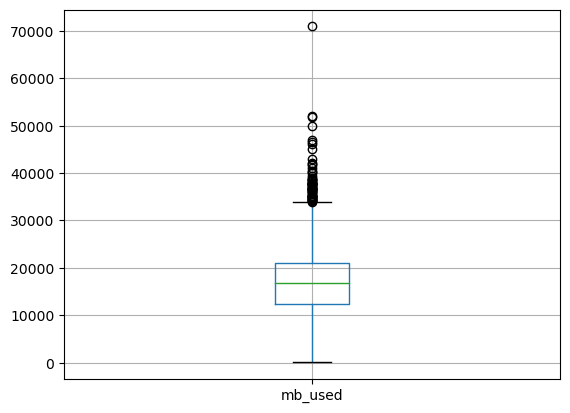

In [72]:
# Display a boxplot graph of the total monthly internet traffic volume
df.boxplot('mb_used')

Users of both prepaid plans use a relatively increasing amount of internet traffic from month 1 to month 12 and certainly the most in month 12, but the average internet traffic volume with the ultimate plan in month 3 almost matches the average duration in month 12. This means that users of this package use more internet traffic volume in the 3rd month with a large amount which results in a higher average. The difference in the volume of internet traffic spent on the two packages shows a significant difference in each month where the surf package is always the bigger one. The boxplot shows that there are data outliers in this internet traffic volume data.

## Revenue

This step will showing of comparing between the average amount of revenue per package per month for every plan.

<Axes: xlabel='month'>

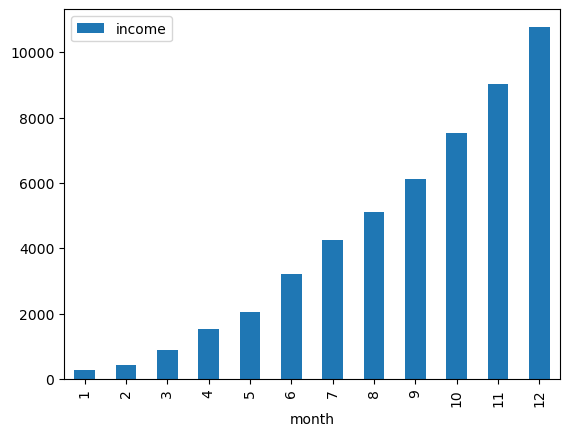

In [73]:
# Comparing the average amount of revenue per package per month
df_plan_ultimate_bar = df_plan_ultimate.pivot_table(index='month', values='income', aggfunc='sum')

# Display bar chart
df_plan_ultimate_bar.plot(kind = 'bar')

<Axes: xlabel='month'>

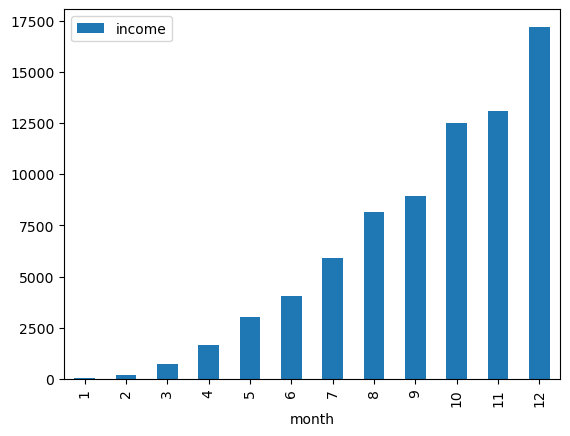

In [74]:
# Comparing the average amount of revenue per package per month
df_plan_surf_bar = df_plan_surf.pivot_table(index='month', values='income', aggfunc='sum')

# Display bar chart
df_plan_surf_bar.plot(kind = 'bar')

<Axes: xlabel='month'>

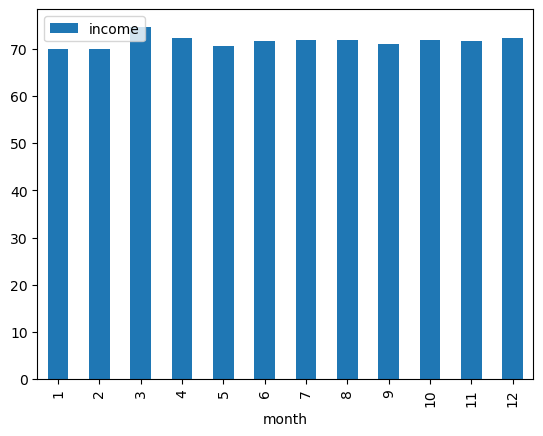

In [75]:
# Comparing the average amount of revenue per package per month
df_plan_ultimate_bar_mean = df_plan_ultimate.pivot_table(index='month', values='income', aggfunc='mean')

# Display bar chart
df_plan_ultimate_bar_mean.plot(kind = 'bar')

<Axes: xlabel='month'>

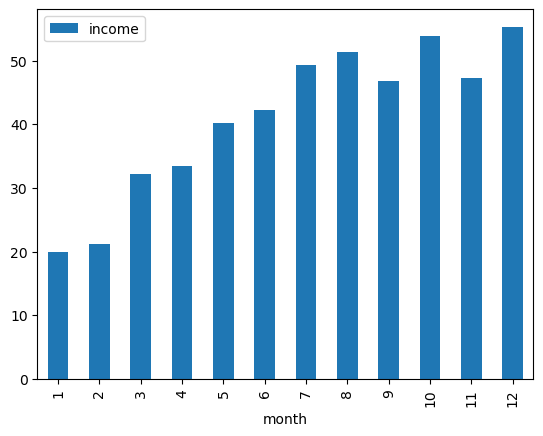

In [76]:
# Comparing the average amount of revenue per package per month
df_plan_surf_bar_mean = df_plan_surf.pivot_table(index='month', values='income', aggfunc='mean')

# Display bar chart
df_plan_surf_bar_mean.plot(kind = 'bar')

In [77]:
# Calculating the average of monthly income amounts
df_users_income['income'].mean()

56.127382639503985

In [78]:
# Calculating the variance of total monthly income
np.var(df_users_income['income'])

1756.1233049740763

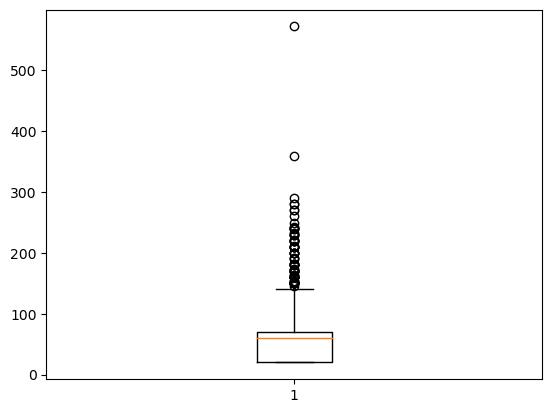

In [79]:
# Display a boxplot graph of the total monthly income
plt.boxplot(df_users_income['income'])
plt.show()


The income earned by users of both prepaid packages increased relatively from month 1 to month 12 and of course the most was in month 12, but the average income with the ultimate package looked fairly similar each month. This means that the users of this package are quite loyal to their subscription. In contrast to the surf package whose average fluctuates quite a bit each month. The difference in the amount of revenue earned on the two packages shows a significant difference in each month where the surf package is always the one that gets more revenue. In the boxplot, it can be seen that there are data outliers in this internet traffic volume data.

## Testing Statistical Hypotheses

The available datasets are df_ultimate which contains the income of ultimate package users and df_surf contains the income of surf package users. The hypothesis to be tested states that the average income of Ultimate and Surf prepaid package users is different. The statistical test performed is hypothesis testing of the equality of the means of two populations. The alpha value used is 0.05.

In [80]:
# Hypothesis testing

alpha = 0.05

results = st.ttest_ind(df_ultimate, df_surf)

print('p-value:', results.pvalue)

# comparing p value with significance level
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: [1.03741586e-34]
We reject the null hypothesis


The available datasets are df_users_income_NYNJ which contains the income of users from the NY-NJ region and df_users_income_not_NYNJ contains the income of users other than from the NY-NJ region. The hypothesis to be tested states that the average of users in the NY-NJ region is different from the income of users from other regions. The statistical test performed is hypothesis testing of equality of means of two populations. The alpha value used is 0.05.

In [81]:
# Hypothesis testing

alpha = 0.05

results = st.ttest_ind(df_users_income_NYNJ['income'],df_users_income_not_NYNJ['income'])

print('p-value:', results.pvalue)

# comparing p value with significance level
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 0.3756219381689616
We cannot reject the null hypothesis


## General Conclusion


From the various analyses that have been carried out, the following conclusions are drawn:
- The available datasets are prepaid plan, user, call, message/SMS and internet datasets. In the user dataset, the `reg_date` and `churn_date` fields are still in object format and need to be converted to datetime. This is also the case for the `call_date` column in the call dataset, the `message_date` column in the message/SMS dataset and the `session_date` column in the internet dataset. In the user, call, message/SMS and internet datasets, the `month` column was also added to each dataset to facilitate further aggregation.
- Aggregation is performed on the number of calls, the number of minutes spent, the number of messages sent and the volume of internet traffic used by users per month, in which case a pivot_table() is required to facilitate analysis. It is also added by calculating the revenue earned from users per month based on their prepaid package.
- The behavior of users of prepaid packages seen from the number of calls made, messages sent and the volume of internet traffic spent each month shows that the Surf package is the most used every month compared to the Ultimate package.
- The highest revenue is obtained from the Surf package but the most stable average revenue is the Ultimate package while the Surf package average revenue tends to fluctuate.
- The statistical hypothesis test stating that the average income of Ultimate and Surf prepaid plan users is different found that the average of Ultimate and Surf prepaid plan users is different, possibly because one of the two prepaid plans is in high demand by users.
- The statistical hypothesis test states that the average income of users in the NY-NJ region is different from the income of users from other regions. The results show that the average income of Ultimate and Surf prepaid plan users is indeed different, but there is a 37% probability that they will randomly get the same average. This probability value is high enough to be used as a reference that the average income of users in the NY-NJ region is different from the income of users from other regions.